# 1. Important Information

# 2. Loading the Data

Import all of the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the data from the '.csv' file into a 'pandas dataframe'.

In [2]:
data = pd.read_csv('RICE.csv')

data.head()

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack


# 3. Data Exploration

## 3.1 Attribute Analysis

### Understanding each feature

- **Observation Year**: The fiscal year that the observation / reading was made.
- **Standard Week**: The week of the year that the observation / reading was made (Ranging from 1 to 52).
- **Pest Value**: The numerical value of the reading that was taken. This is used to create the target attribute.
- **Collection Type**: The process / procedure used to take the reading.
- **MaxT**: The maximum temperature during the respective week.
- **MinT**: The minimum temperature during the respective week.
- **RH1(%)**: The maximum relative humidity during the respective week.
- **RH2(%)**: The minimum relative humidity during the respective week.
- **RF(mm)**: The rainfall (in mm) during the respective week.
- **WS(kmph)**: The wind speed (in kmph) during the respective week.
- **SSH(hrs)**: The average sunshine hours per day during the respective week.
- **EVP(mm)**: The evaporation (in mm) during the respective week.
- **Pest Name**: The recorded pest's name.
- **Location**: The location where the reading was collected / recorded.

### Coverage
- **Temporal Coverage Start Date**: 1960/12/31
- **Temporal Coverage End Date**: 2011/12/31
- **Geospatial Coverage**: India

In [3]:
data.describe()

,Observation Year,Standard Week,Pest Value,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm)
count,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000,19404.000000
mean,2000.024789,26.473717,807.944081,31.169006,20.404540,82.190981,53.725763,19.414152,4.501268,6.858529,5.877180
std,9.827306,15.016247,5290.180315,4.904610,5.388381,13.846883,18.948801,39.160009,3.194973,4.176542,6.536221
min,1959.000000,1.000000,0.000000,10.900000,0.800000,9.300000,6.700000,0.000000,0.000000,0.000000,0.000000
25%,1996.000000,13.000000,0.000000,28.800000,17.500000,79.100000,38.000000,0.000000,2.300000,4.900000,2.900000
50%,2001.000000,26.000000,3.000000,30.900000,22.000000,87.300000,56.600000,0.000000,3.700000,7.300000,4.000000
75%,2007.000000,39.000000,92.000000,33.425000,24.400000,91.000000,69.000000,21.400000,5.900000,8.900000,6.000000
max,2011.000000,52.000000,311169.000000,71.600000,30.900000,100.000000,95.100000,444.400000,27.600000,127.100000,68.300000


### Empty cells

In [4]:
data.isnull().sum()

Observation Year    0
Standard Week       0
Pest Value          0
Collection Type     0
MaxT                0
MinT                0
RH1(%)              0
RH2(%)              0
RF(mm)              0
WS(kmph)            0
SSH(hrs)            0
EVP(mm)             0
PEST NAME           0
Location            0
dtype: int64

### "Collection Type"

In [5]:
print(data['Collection Type'].describe())
print('')
print(data['Collection Type'].unique())
print('')
print(data['Collection Type'].value_counts())

count                 19404
unique                    5
top       Number/Light trap
freq                  16430
Name: Collection Type, dtype: object

['Number/hill' 'Number/Light trap' 'Percent Damage'
 'Number/Pheromone trap' 'Percentage']

Collection Type
Number/Light trap        16430
Percentage                2298
Number/Pheromone trap      520
Percent Damage             104
Number/hill                 52
Name: count, dtype: int64


### "Pest Name"

In [6]:
print(data['PEST NAME'].describe())
print('')
print(data['PEST NAME'].unique())
print('')
print(data['PEST NAME'].value_counts())

count               19404
unique                 11
top       Yellowstemborer
freq                 4333
Name: PEST NAME, dtype: object

['Brownplanthopper' 'Gallmidge' 'Greenleafhopper' 'LeafFolder'
 'Yellowstemborer' 'Caseworm' 'Miridbug' 'Whitebackedplanthopper'
 'ZigZagleafhopper' 'LeafBlast' 'NeckBlast']

PEST NAME
Yellowstemborer           4333
Gallmidge                 3016
Greenleafhopper           2287
LeafBlast                 2090
Brownplanthopper          1958
LeafFolder                1716
Whitebackedplanthopper    1248
Miridbug                  1144
Caseworm                   936
ZigZagleafhopper           468
NeckBlast                  208
Name: count, dtype: int64


### "Location"

In [7]:
print(data['Location'].describe())
print('')
print(data['Location'].unique())
print('')
print(data['Location'].value_counts())

count        19404
unique           6
top       Maruteru
freq          7053
Name: Location, dtype: object

['Cuttack' 'Ludhiana' 'Maruteru' 'Palampur' 'Raipur' 'Rajendranagar']

Location
Maruteru         7053
Rajendranagar    5539
Raipur           2132
Ludhiana         1976
Cuttack          1456
Palampur         1248
Name: count, dtype: int64


## 3.2 Pest Name Analysis

### "Brownplanthopper"

In [8]:
data_BrownPlanthopper = data[data['PEST NAME'] == 'Brownplanthopper']
print(data_BrownPlanthopper['Collection Type'].describe())
print('')
print(data_BrownPlanthopper['Collection Type'].unique())

count                  1958
unique                    2
top       Number/Light trap
freq                   1906
Name: Collection Type, dtype: object

['Number/hill' 'Number/Light trap']


### "Gallmidge"

In [9]:
data_Gallmidge = data[data['PEST NAME'] == 'Gallmidge']
print(data_Gallmidge['Collection Type'].describe())
print('')
print(data_Gallmidge['Collection Type'].unique())

count                  3016
unique                    2
top       Number/Light trap
freq                   2912
Name: Collection Type, dtype: object

['Number/Light trap' 'Percent Damage']


### "Greenleafhopper"

In [10]:
data_Greenleafhopper = data[data['PEST NAME'] == 'Greenleafhopper']
print(data_Greenleafhopper['Collection Type'].describe())
print('')
print(data_Greenleafhopper['Collection Type'].unique())

count                  2287
unique                    1
top       Number/Light trap
freq                   2287
Name: Collection Type, dtype: object

['Number/Light trap']


### "LeafFolder"

In [11]:
data_LeafFolder = data[data['PEST NAME'] == 'LeafFolder']
print(data_LeafFolder['Collection Type'].describe())
print('')
print(data_LeafFolder['Collection Type'].unique())

count                  1716
unique                    1
top       Number/Light trap
freq                   1716
Name: Collection Type, dtype: object

['Number/Light trap']


### "Yellowstemborer"

In [12]:
data_LeafFolder = data[data['PEST NAME'] == 'LeafFolder']
print(data_LeafFolder['Collection Type'].describe())
print('')
print(data_LeafFolder['Collection Type'].unique())

count                  1716
unique                    1
top       Number/Light trap
freq                   1716
Name: Collection Type, dtype: object

['Number/Light trap']


### "Caseworm"

In [13]:
data_Caseworm = data[data['PEST NAME'] == 'Caseworm']
print(data_Caseworm['Collection Type'].describe())
print('')
print(data_Caseworm['Collection Type'].unique())

count                   936
unique                    1
top       Number/Light trap
freq                    936
Name: Collection Type, dtype: object

['Number/Light trap']


### "Miridbug"

In [14]:
data_Miridbug = data[data['PEST NAME'] == 'Miridbug']
print(data_Miridbug['Collection Type'].describe())
print('')
print(data_Miridbug['Collection Type'].unique())

count                  1144
unique                    1
top       Number/Light trap
freq                   1144
Name: Collection Type, dtype: object

['Number/Light trap']


### "Whitebackedplanthopper"

In [15]:
data_Whitebackedplanthopper = data[data['PEST NAME'] == 'Whitebackedplanthopper']
print(data_Whitebackedplanthopper['Collection Type'].describe())
print('')
print(data_Whitebackedplanthopper['Collection Type'].unique())

count                  1248
unique                    1
top       Number/Light trap
freq                   1248
Name: Collection Type, dtype: object

['Number/Light trap']


### "ZigZagleafhopper"

In [16]:
data_ZigZagleafhopper = data[data['PEST NAME'] == 'ZigZagleafhopper']
print(data_ZigZagleafhopper['Collection Type'].describe())
print('')
print(data_ZigZagleafhopper['Collection Type'].unique())

count                   468
unique                    1
top       Number/Light trap
freq                    468
Name: Collection Type, dtype: object

['Number/Light trap']


### "LeafBlast"

In [17]:
data_LeafBlast = data[data['PEST NAME'] == 'LeafBlast']
print(data_LeafBlast['Collection Type'].describe())
print('')
print(data_LeafBlast['Collection Type'].unique())

count           2090
unique             1
top       Percentage
freq            2090
Name: Collection Type, dtype: object

['Percentage']


### "NeckBlast"

In [18]:
data_NeckBlast = data[data['PEST NAME'] == 'NeckBlast']
print(data_NeckBlast['Collection Type'].describe())
print('')
print(data_NeckBlast['Collection Type'].unique())

count            208
unique             1
top       Percentage
freq             208
Name: Collection Type, dtype: object

['Percentage']


## 3.3 Data Visualization

### Attribute Frequency

#### Bar Charts

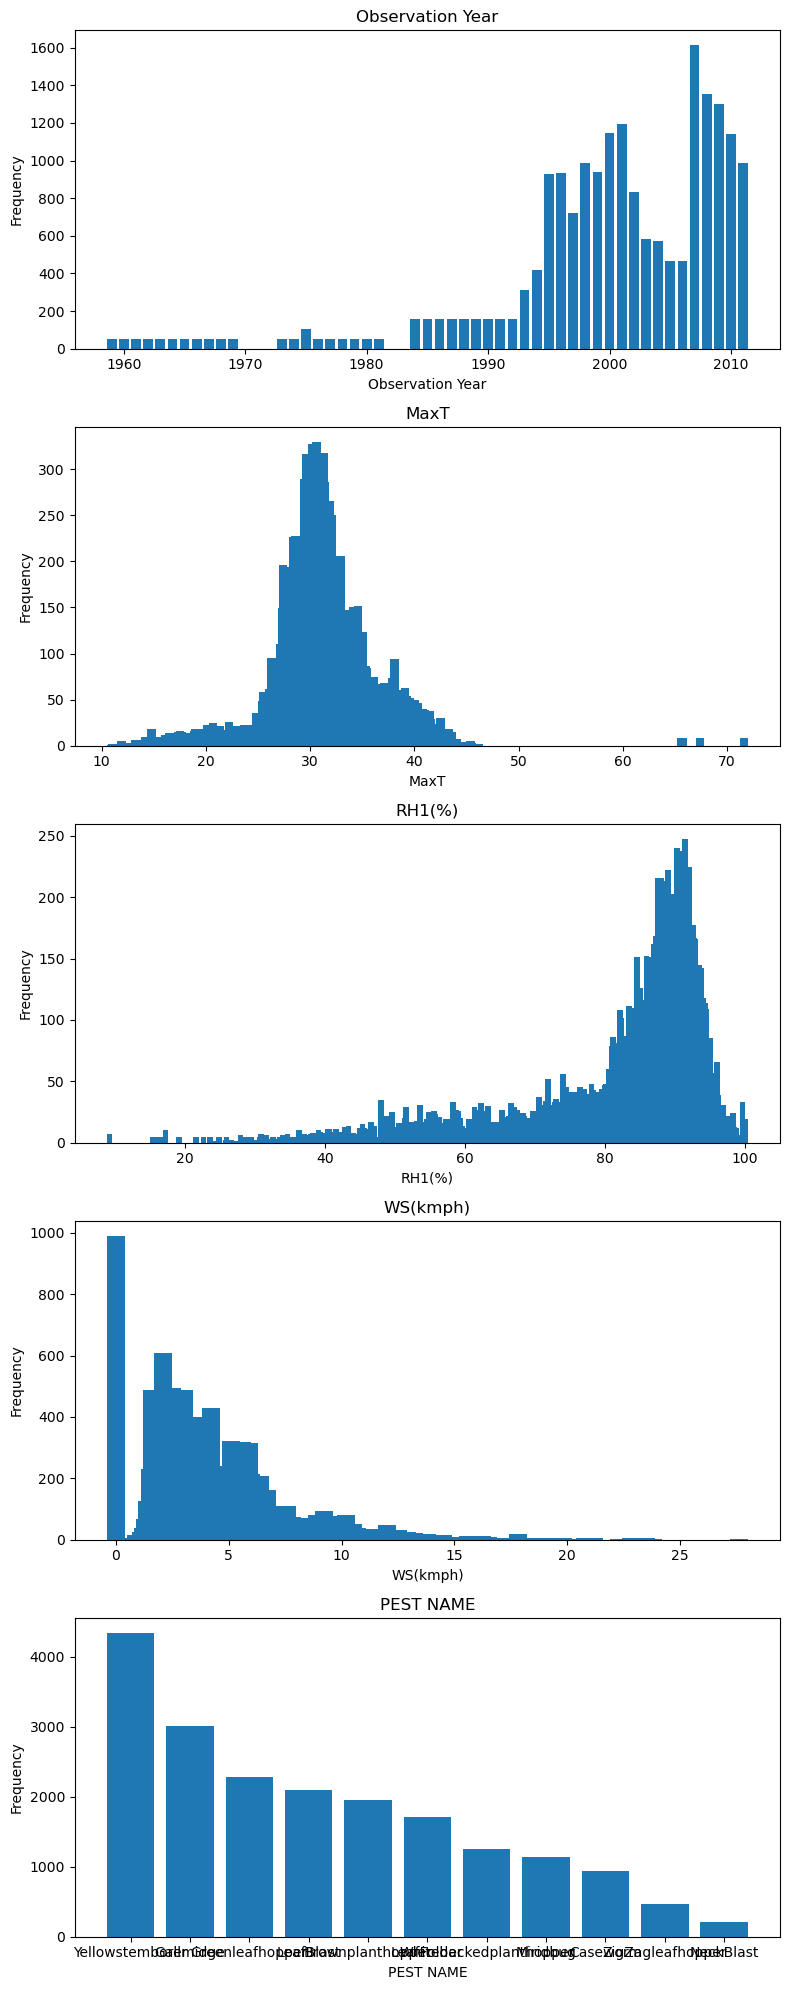

In [19]:
# Select the columns for bar plots
columns = ['Observation Year', 'MaxT', 'RH1(%)', 'WS(kmph)', 'PEST NAME']

# Create subplots for bar plots
fig, axs = plt.subplots(len(columns), 1, figsize=(8, 4*len(columns)))

# Create bar plots for each column
for i, column in enumerate(columns):
    # Count the frequency of each unique value in the column
    value_counts = data[column].value_counts()
    
    # Plotting the bar graph
    axs[i].bar(value_counts.index, value_counts.values)
    axs[i].set_title(column)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel("Frequency")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

#### Pie Charts

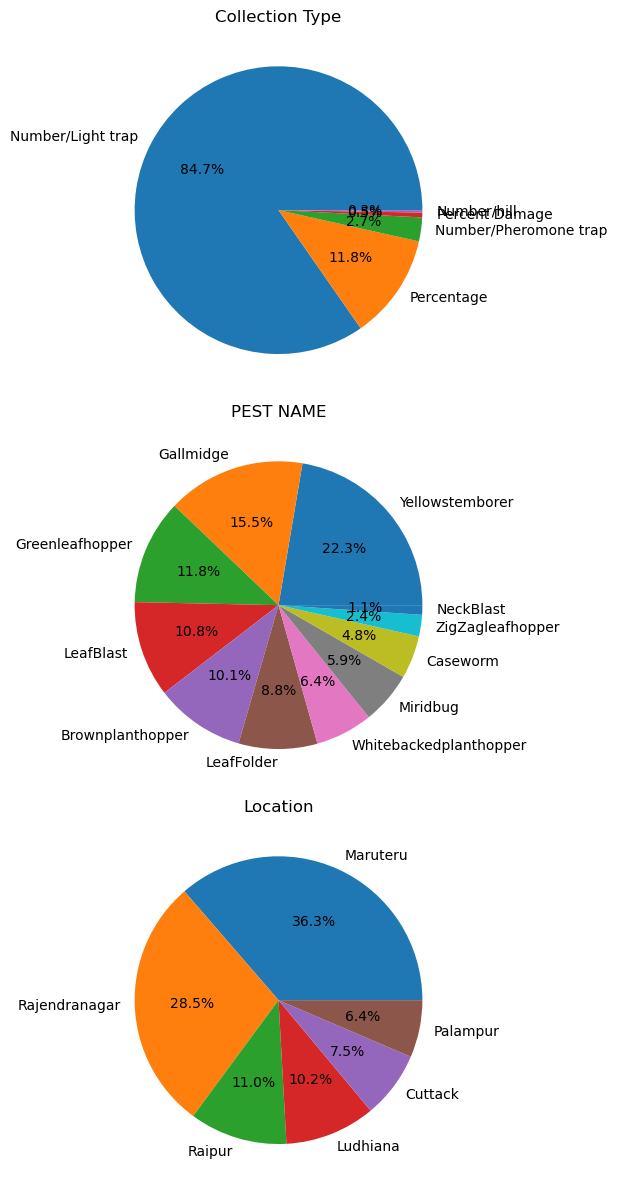

In [20]:
# Select the columns for pie charts
columns = ['Collection Type', 'PEST NAME', 'Location']

# Create subplots for pie charts (stacked vertically)
fig, axs = plt.subplots(len(columns), 1, figsize=(8, 4*len(columns)))

# Ensure axs is iterable for single subplot case
if len(columns) == 1:
    axs = [axs]

# Create pie charts for each column
for i, column in enumerate(columns):
    # Count the frequency of each unique value in the column
    value_counts = data[column].value_counts()
    
    # Plotting the pie chart
    axs[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axs[i].set_title(column)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

# 4. Data Preprocessing

## 4.1 Creating the Target Attribute
The "Outbreak" attribute is used as the target attribute for the Machine Learning Models for the "pest outbreak prediction", which is a typical Decision Support System (DSS). It is  created with the following logic:

"If the 'Pest Value' is anything above '0', it is seen as an outbreak."

In [21]:
data['Outbreak'] = (data['Pest Value'] > 0).astype(int)
data.head()

,Observation Year,Standard Week,Pest Value,Collection Type,MaxT,MinT,RH1(%),RH2(%),RF(mm),WS(kmph),SSH(hrs),EVP(mm),PEST NAME,Location,Outbreak
0,2003,1,0.0,Number/hill,27.9,14.8,94.7,51.3,0.0,3.1,8.7,2.7,Brownplanthopper,Cuttack,0
1,2003,2,0.0,Number/hill,27.2,15.0,93.9,53.1,0.0,2.1,8.7,2.4,Brownplanthopper,Cuttack,0
2,2003,3,0.0,Number/hill,28.7,18.3,94.1,56.7,0.6,4.8,6.7,2.8,Brownplanthopper,Cuttack,0
3,2003,4,0.0,Number/hill,25.3,16.4,90.9,57.4,0.3,6.5,5.3,3.0,Brownplanthopper,Cuttack,0
4,2003,5,0.0,Number/hill,28.8,18.7,95.7,55.0,0.0,5.2,6.3,2.8,Brownplanthopper,Cuttack,0


### Total Outbreak Percentage 

In [22]:
count_ones = data['Outbreak'].sum()
total = data['Outbreak'].count()
pct = count_ones / total * 100
print(f"Outbreak == 1: {count_ones}/{total} ({pct:.2f}%)")

Outbreak == 1: 10734/19404 (55.32%)


This represents an balanced dataset. Allowing the model to be trained equally with records that contain an outbreak and records that don't.

## 4.2 